In [ ]:
# Meta Ads Performance Analysis

# This notebook simulates real-world Meta Ads campaign performance
# analysis using Python.
# The objective is to evaluate marketing efficiency using KPIs such
# as CTR, CPC, CPM, and ROAS.

#CTR (Click-Through Rate) shows ad engagement (clicks/impressions)
# CPM (Cost Per Mille/Thousand) is cost per 1000 views
# CPC (Cost Per Click) is what you pay for each click
# ROAS (Return on Ad Spend) measures revenue generated per dollar spent on ads
# helping gauge campaign profitability and efficiency

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [5]:
# Generate Mock Meta Ads Dataset
# Stimulate 60 days of campaign data
# Date range

dates = pd.date_range(start="2025-01-01", periods=60)

campaigns = [
    "Conversion - Women Dresses",
    "Conversion - Men Shirts",
    "Traffic - New Arrivals",
    "Retargeting - Website Visitors"
]

ad_sets = ["Broad", "Interest-Based", "Lookalike", "Retargeting"]
creative_types = ["Image", "Video", "Carousel"]

data = []

for date in dates:
    for campaign in campaigns:
        impressions = np.random.randint(3000, 20000)
        clicks = np.random.randint(50, int(impressions * 0.05))
        spend = round(np.random.uniform(50, 500), 2)
        conversions = np.random.randint(1, max(2, int(clicks * 0.1)))
        revenue = round(conversions * np.random.uniform(80, 150), 2)

        data.append([
            date,
            campaign,
            np.random.choice(ad_sets),
            np.random.choice(creative_types),
            impressions,
            clicks,
            spend,
            conversions,
            revenue
        ])

columns = [
    "date",
    "campaign_name",
    "ad_set",
    "creative_type",
    "impressions",
    "clicks",
    "spend",
    "conversions",
    "revenue"
]

df = pd.DataFrame(data, columns=columns)

df.head()


,date,campaign_name,ad_set,creative_type,impressions,clicks,spend,conversions,revenue
0,2025-01-01,Conversion - Women Dresses,Lookalike,Video,18795,910,132.55,72,8777.24
1,2025-01-01,Conversion - Men Shirts,Retargeting,Carousel,19850,264,76.14,24,2480.63
2,2025-01-01,Traffic - New Arrivals,Retargeting,Image,4685,102,486.46,6,480.33
3,2025-01-01,Retargeting - Website Visitors,Interest-Based,Carousel,9396,285,60.38,27,3316.40
4,2025-01-02,Conversion - Women Dresses,Retargeting,Image,3189,111,403.33,3,320.32


In [6]:
# Data Cleaning & Validation

# Check missing values
df.isnull().sum()

# Remove rows with zero clicks to avoid division errors
df = df[df["clicks"] > 0]

# Ensure correct data types
df["date"] = pd.to_datetime(df["date"])
numeric_cols = ["impressions", "clicks", "spend", "conversions", "revenue"]
df[numeric_cols] = df[numeric_cols].astype(float)


In [7]:
# KPI Feature Engineering (Core Marketing Metrics)

df["CTR"] = df["clicks"] / df["impressions"]
df["CPC"] = df["spend"] / df["clicks"]
df["CPM"] = (df["spend"] / df["impressions"]) * 1000
df["ROAS"] = df["revenue"] / df["spend"]

# Optional bonus KPIs
df["Conversion_Rate"] = df["conversions"] / df["clicks"]
df["AOV"] = df["revenue"] / df["conversions"]

df.round(3).head()


,date,campaign_name,ad_set,creative_type,impressions,clicks,spend,conversions,revenue,CTR,CPC,CPM,ROAS,Conversion_Rate,AOV
0,2025-01-01,Conversion - Women Dresses,Lookalike,Video,18795.0,910.0,132.55,72.0,8777.24,0.048,0.146,7.052,66.218,0.079,121.906
1,2025-01-01,Conversion - Men Shirts,Retargeting,Carousel,19850.0,264.0,76.14,24.0,2480.63,0.013,0.288,3.836,32.580,0.091,103.360
2,2025-01-01,Traffic - New Arrivals,Retargeting,Image,4685.0,102.0,486.46,6.0,480.33,0.022,4.769,103.834,0.987,0.059,80.055
3,2025-01-01,Retargeting - Website Visitors,Interest-Based,Carousel,9396.0,285.0,60.38,27.0,3316.40,0.030,0.212,6.426,54.925,0.095,122.830
4,2025-01-02,Conversion - Women Dresses,Retargeting,Image,3189.0,111.0,403.33,3.0,320.32,0.035,3.634,126.475,0.794,0.027,106.773


In [15]:
# EDA (Business Questions)
# Campaign Performance Summary

# Key Insights
# 1. Traffic campaigns show higher average ROAS despite lowest CPC
# indicating strong downstream conversion efficiency
# click quality is high, even if acquisition cost is moderate
# Action: Scale budget cautiously while monitoring conversion quality.

# 2.Retargeting Campaign Is Cost-Efficient
#Lowest CPC (1.32) ,Strong ROAS (10.47) with lower spend
# Indicates warm audiences responding efficiently
#Action: Maintain or gradually increase spend; ideal candidate for scaling.

campaign_summary = (
    df.groupby("campaign_name")
      .agg({
          "spend": "sum",
          "revenue": "sum",
          "ROAS": "mean",
          "CTR": "mean",
          "CPC": "mean"
      })
      .sort_values("ROAS", ascending=False)
)

campaign_summary.round(2)


,spend,revenue,ROAS,CTR,CPC
campaign_name,,,,,
Traffic - New Arrivals,15761.47,120259.34,12.66,0.03,1.65
Retargeting - Website Visitors,15172.90,117826.78,10.47,0.03,1.32
Conversion - Women Dresses,16514.00,124988.37,10.29,0.03,1.51
Conversion - Men Shirts,16978.72,104958.29,7.85,0.03,1.70


In [10]:
# Creative Type Performance

creative_summary = (
    df.groupby("creative_type")
      .agg({
          "ROAS": "mean",
          "CTR": "mean",
          "CPC": "mean"
      })
)

creative_summary.round(2)


# Key Insigths
# Video creatives deliver the highest ROAS while maintaining the
# lowest CPC, despite similar CTR across creative formats.

,ROAS,CTR,CPC
creative_type,,,
Carousel,10.73,0.03,1.62
Image,7.54,0.03,1.85
Video,12.30,0.03,1.20


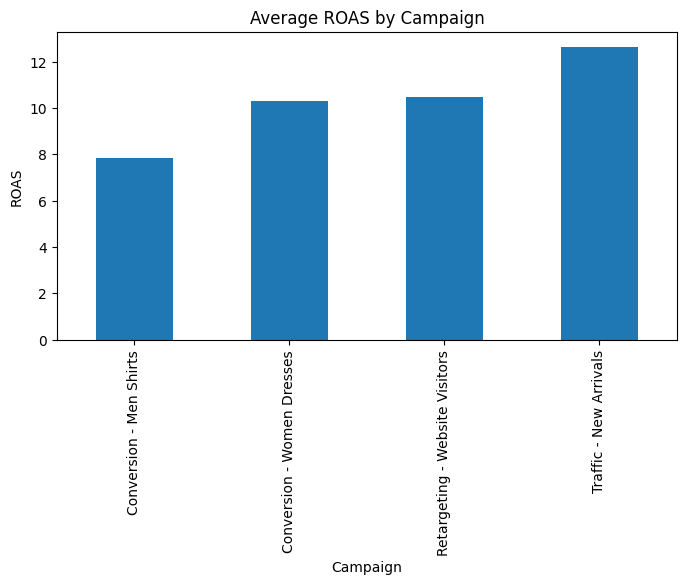

In [11]:
# Basic Visuals (For Insight Validation)

# ROAS by Campaign

campaign_summary["ROAS"].plot(kind="bar", figsize=(8,4))
plt.title("Average ROAS by Campaign")
plt.ylabel("ROAS")
plt.xlabel("Campaign")
plt.show()

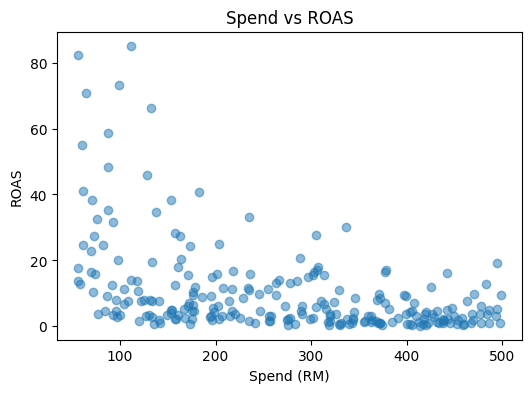

In [12]:
# Spend vs ROAS (Efficiency Check)

plt.figure(figsize=(6,4))
plt.scatter(df["spend"], df["ROAS"], alpha=0.5)
plt.title("Spend vs ROAS")
plt.xlabel("Spend (RM)")
plt.ylabel("ROAS")
plt.show()

# Key Insights
# High spend does not always correlate with high ROAS,
# indicating inefficient budget allocation.

In [13]:
# Export Clean Dataset For PowerBI

df.to_csv("meta_ads_mock_data.csv", index=False)